In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df = df.drop_duplicates()

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [5]:
# Specify the columns for which you want to drop outliers
columns_to_filter = ['cp', 'trtbps', 'chol', 'fbs', 'restecg','thalachh','exng','caa']

# Calculate the first and third quartiles (Q1 and Q3) for each specified column
Q1 = df[columns_to_filter].quantile(0.25)
Q3 = df[columns_to_filter].quantile(0.75)

# Calculate the IQR (Interquartile Range) for each specified column
IQR = Q3 - Q1

# Define the lower and upper bounds for each specified column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers in the specified columns
filtered_df = df.copy()
for column in columns_to_filter:
    filtered_df = filtered_df[(filtered_df[column] >= lower_bound[column]) & (filtered_df[column] <= upper_bound[column])]

# Display the shape of the original and filtered DataFrames
print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", filtered_df.shape)

Original DataFrame shape: (302, 14)
Filtered DataFrame shape: (230, 14)


In [6]:
col = ['sex','age','output']
Xall = filtered_df.drop(col, axis = 1)
yall = filtered_df['output']

In [7]:
from sklearn.model_selection import train_test_split
X, Xt, y, yt = train_test_split(Xall, yall, test_size = 0.2, random_state=0)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler().fit(X)
X = scl.transform(X)
Xt = scl.transform(Xt)

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
 
    ('lr', LogisticRegression(random_state=0))
])

params = {     
   
    "lr__C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],     
}

lr_clf = GridSearchCV(pipe, params, n_jobs=2,cv=10)
lr_clf.fit(X, y)
print("Best parameter (CV score=%0.3f):" % lr_clf.best_score_)
print(lr_clf.best_params_)

Best parameter (CV score=0.838):
{'lr__C': 10}


In [10]:
yp = lr_clf.predict(Xt)
lgr = sum(yp == yt) / len(yt)
lgr

0.9130434782608695

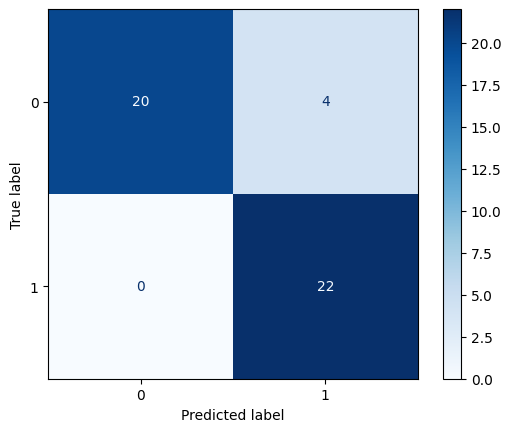

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(yt, yp, cmap="Blues")
plt.grid(False)
plt.show()

In [12]:
import pickle

with open('lr_model.pkl', 'wb') as file:
    pickle.dump(lr_clf, file)

In [3]:
import pandas as pd
import pickle

# Load the pre-trained model using pickle
with open('models/lr_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Features for testing
test_features = {
    'cp': [1],
    'trtbps': [130],
    'chol': [250],
    'fbs': [0],
    'restecg': [1],
    'thalachh': [150],
    'exng': [0],
    'oldpeak': [2.5],
    'slp': [2],
    'caa': [1],
    'thall': [3],
}

# Create a DataFrame with the test features
test_data = pd.DataFrame(test_features)

# Use the model to make predictions based on the test features
prediction = model.predict(test_data)[0]

# Display the prediction
if prediction == 0:
    result = 'No Heart Attack'
else:
    result = 'Heart Attack'

print('Prediction:', test_data)


Prediction:    cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  caa  thall
0   1     130   250    0        1       150     0      2.5    2    1      3


c:\Users\soill\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [12]:
# pip show scikit-learn